In [ ]:
! source activate tf

# 训练SEResNet

In [ ]:
! python train.py -m SEResNet50 -p / root / work / CAPTCHA_full / model_data / KerasResNet50 / checkpoints / KerasResNet50.h5

In [ ]:
! python train.py -m SEResNet50 -p / root /.keras / models / resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

# 微调SE模块

In [ ]:
! python fineTuningSE.py -m SEResNet50 -p / root / work / CAPTCHA_full / model_data / KerasResNet50 / checkpoints / KerasResNet50.h5

# 融合模型

In [ ]:
!python mergeTuning.py

# 预测

In [3]:
import numpy as np
import config
from cv2 import resize, imread
from keras import Model
from keras.models import load_model
import csv

from util.imageProcess import imgProcessNorm
from util.modelUtils import word_acc
from util import labelProcess
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [9]:
# 加载模型
model_path = r"F:\model_data\VGG\checkpoints\VGG.h5"
model: Model = load_model(model_path, custom_objects={"word_acc": word_acc})

# 加载数据集
filename = 'F:/data_set/captcha/test/test_label.csv'
results = csv.DictReader(open(filename))
labels = {}
for result in results:
    # print(result['label'])
    labels[result['ID']] = result['label']

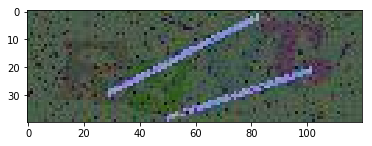

预测结果：['RyYT']
真实结果：RyVT


In [15]:
# 预测
pic_name = '82.jpg'
pics_path1 = 'F:/data_set/captcha/test/' + pic_name
x1 = imread(filename=pics_path1)
plt.imshow(x1)
plt.show()
x1 = imgProcessNorm(img=x1, shape=config.Model.img_shape)

x1 = x1[np.newaxis, ::]

predict = model.predict(x1)
pred = labelProcess.decode_predict(predict)
print('预测结果：' + str(pred))
print('真实结果：' + labels[pic_name])